In [11]:
# define logging and working directory
import os
import logging
import platform
print(os.getcwd())
# change working directory to project root - neccessary for jupyter notebooks
if platform.system() is "Windows":
    os.chdir('E:\\sven\\git\\cardio')
else:
    os.chdir('/Users/minority/Code/Git/cardio')
print(os.getcwd())

from src.utils.utils_io import Console_and_file_logger, ensure_dir
from src.utils.myshow import myshow, myshow3d
from src.data.dataset import describe_volume, describe_path
from src.visualization.visualize import plot_value_histogram

Console_and_file_logger('describe_volumes', logging.INFO)

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import glob
from ipywidgets import interact
from src.utils.myshow import myshow, myshow3d
from scipy import stats
import SimpleITK as sitk
import numpy as np
import pandas as pd
from collections import Counter
from matplotlib.ticker import PercentFormatter
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
%reload_ext autoreload
%autoreload 2

E:\sven\git\cardio
E:\sven\git\cardio


## How does the percentile value influence the value clipping

In [27]:
# define 20 steps from 0.5 to 0.9
percentage1 = np.linspace(0.5, 0.9, 20) 
# define 20 steps from 0.9 to 1.0
percentage2 = np.linspace(0.9, 1, 20)
percentage = np.append(percentage1, percentage2)

## Load one image, calculate the percentile values for percentiles between 0.5 and 1

In [44]:
df_q = pd.DataFrame()
files = glob.glob('data/raw/tetra/3D/**/*img.nrrd')
len(files)

In [59]:
df_q['percentage'] = percentage

## Calculate the quantile % and clipping value correlation for all images

In [45]:
for f in files:
    q = []
    img = sitk.ReadImage(f)
    img_nda = sitk.GetArrayFromImage(img)
    nda_img_flat = img_nda.flatten()
    
    for v in percentage:
        q1 =  np.quantile(nda_img_flat, v, overwrite_input=False)
        q.append(q1)  
    df_q[f] = q

## Plot the quantile % and clipping value correlation for all images

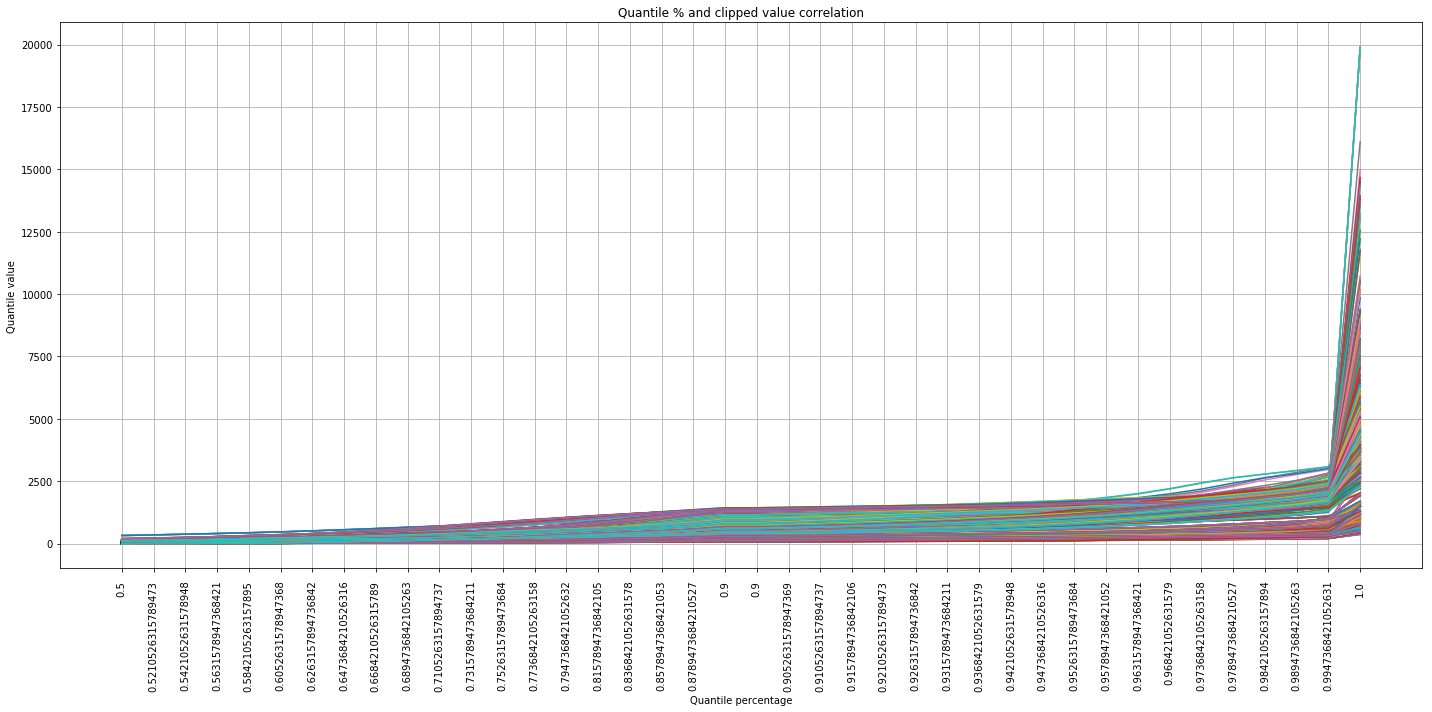

In [77]:
plt.rcParams['xtick.major.pad']='8'

plt.figure(figsize=(20,10))
for f in files:
    plt.plot(df_q[f])
plt.title('Quantile % and clipped value correlation')
plt.xlabel('Quantile percentage')
plt.ylabel('Quantile value')
plt.xticks(np.arange(len(percentage)), percentage, rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

In [54]:
# calculate mean, min and max per quantile threshold
df_q['mean'] = df_q.mean(axis=1)
df_q['min'] = df_q.min(axis=1)
df_q['max'] = df_q.max(axis=1)

## Plot min, mean and max quantile threshold and clipping value correlation

[Text(0, 0, '0.5'),
 Text(0, 0, '0.5210526315789473'),
 Text(0, 0, '0.5421052631578948'),
 Text(0, 0, '0.5631578947368421'),
 Text(0, 0, '0.5842105263157895'),
 Text(0, 0, '0.6052631578947368'),
 Text(0, 0, '0.6263157894736842'),
 Text(0, 0, '0.6473684210526316'),
 Text(0, 0, '0.6684210526315789'),
 Text(0, 0, '0.6894736842105263'),
 Text(0, 0, '0.7105263157894737'),
 Text(0, 0, '0.7315789473684211'),
 Text(0, 0, '0.7526315789473684'),
 Text(0, 0, '0.7736842105263158'),
 Text(0, 0, '0.7947368421052632'),
 Text(0, 0, '0.8157894736842105'),
 Text(0, 0, '0.8368421052631578'),
 Text(0, 0, '0.8578947368421053'),
 Text(0, 0, '0.8789473684210527'),
 Text(0, 0, '0.9'),
 Text(0, 0, '0.9'),
 Text(0, 0, '0.9052631578947369'),
 Text(0, 0, '0.9105263157894737'),
 Text(0, 0, '0.9157894736842106'),
 Text(0, 0, '0.9210526315789473'),
 Text(0, 0, '0.9263157894736842'),
 Text(0, 0, '0.9315789473684211'),
 Text(0, 0, '0.9368421052631579'),
 Text(0, 0, '0.9421052631578948'),
 Text(0, 0, '0.947368421052631

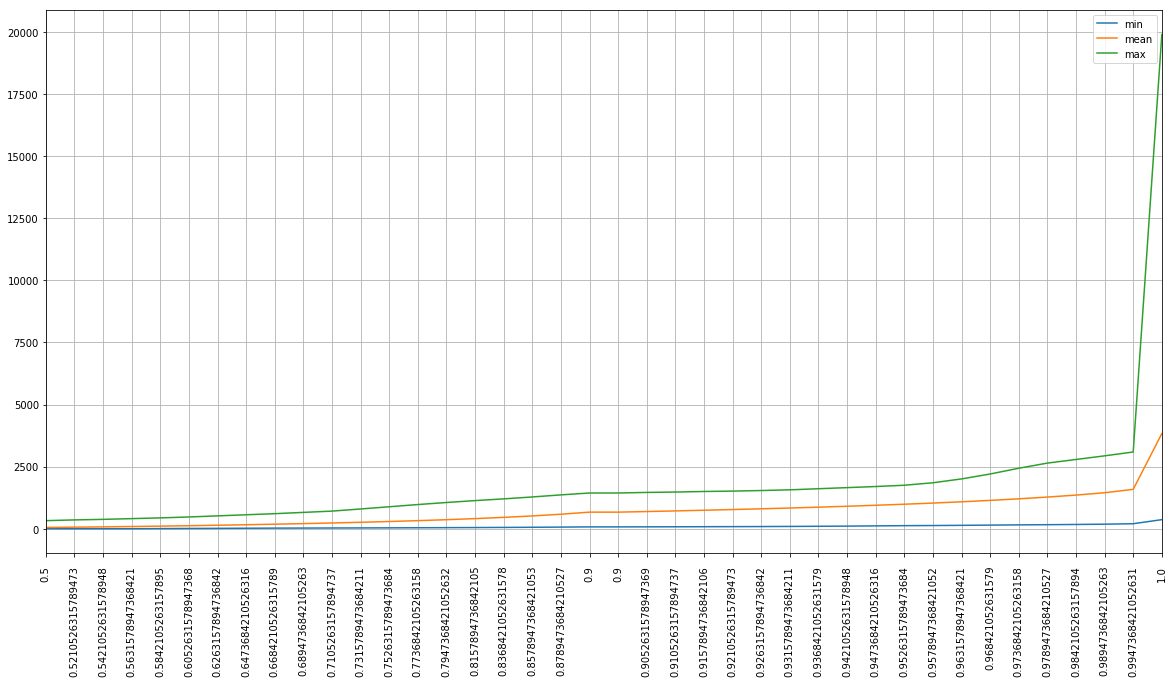

In [72]:
ax = df_q[['min', 'mean', 'max']].plot(kind='line', grid=True, figsize = (20,10))
ax.set_xticks(df_q.index)
ax.set_xticklabels(df_q['percentage'], rotation=90)